In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [37]:
train_data = pd.read_csv('./data/2013-2014_rent.csv')
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')

train_data.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


In [38]:
test_data = pd.read_csv('./data/2015_RentCount.csv')
test_data['MONTH'] = test_data['MONTH'].astype('object')
test_data['HOUR'] = test_data['HOUR'].astype('object')
test_data['WEEKDAY'] = test_data['WEEKDAY'].astype('object')
test_data['SEASON'] = test_data['SEASON'].astype('object')

test_data.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2015,1,1,0,3,3,-4.1,0.3,4.2,82,0.5,0.0
1,1,2015,1,1,1,3,3,-5.7,0.0,2.8,74,0.5,0.0
2,1,2015,1,1,2,3,3,-6.4,0.0,2.6,60,0.5,0.0
3,1,2015,1,1,3,3,3,-6.5,0.0,2.7,53,0.5,0.0
4,1,2015,1,1,4,3,3,-6.6,0.0,2.5,61,0.5,0.0


In [39]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
y_train += np.ones(len(y_train)) # to avoid divide_by_0
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
y_test += np.ones(len(y_test))

In [40]:
# Randomforest를 통한 학습 진행
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

predictions = rf.predict(X=X_test)

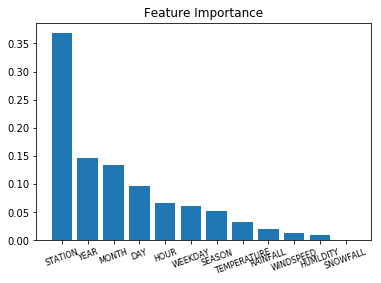

In [41]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

names = train_data.columns

# Barplot: Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()


In [42]:
# RSME 계산
errors=np.sqrt(np.mean((predictions-y_test)**2))

print('Error:', round(errors, 2), 'degrees.')

Error: 1.55 degrees.


In [44]:
# 2015년도 3번 정류장 1월 1일 데이터

test_data2 = test_data[(test_data['STATION'] == 3) & (test_data['MONTH'] == 1) & (test_data['DAY'] == 1)]
X_test2 = test_data2.iloc[:, :-1].values
Y_test2 = test_data2.iloc[:, -1].values

predictions2 = rf.predict(X=X_test2)

In [45]:
# RSME 계산
errors=np.sqrt(np.mean((predictions2-Y_test2)**2))

print('Error:', round(errors, 2), 'degrees.')

Error: 1.41 degrees.


In [49]:
print(predictions2[0])

1.1


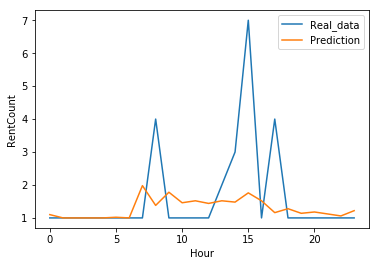

In [66]:
from pylab import legend

Hour = range(0, 23)
plt.plot(Y_test2)
plt.plot(predictions2)

plt.xlabel('Hour')
plt.ylabel('RentCount')
legend(['Real_data', 'Prediction'], loc='best')
plt.show()